<a href="https://colab.research.google.com/github/loguansiang/fyp/blob/main/lstm_technical_indicator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [106]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras import optimizers
import matplotlib.pyplot as plt
from keras.models import load_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from keras.models import Sequential
from keras.layers import LSTM, GRU, Dense, Dropout
from keras import optimizers
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [107]:
url = 'https://raw.githubusercontent.com/loguansiang/fyp/main/SAND%20fyp.csv'
df = pd.read_csv(url)

In [108]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace = True)

In [109]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-08-14,0.086577,0.086577,0.059597,0.065645,0.065645,118988161
2020-08-15,0.066077,0.069509,0.048985,0.050964,0.050964,36213441
2020-08-16,0.051438,0.069508,0.048064,0.060847,0.060847,33023213
2020-08-17,0.060847,0.065073,0.052525,0.053999,0.053999,11686493
2020-08-18,0.053784,0.060990,0.050675,0.051700,0.051700,7401293
...,...,...,...,...,...,...
2022-04-13,2.781983,2.886945,2.751847,2.869923,2.869923,321784424
2022-04-14,2.869366,2.916186,2.714203,2.780882,2.780882,349909147
2022-04-15,2.781060,2.820187,2.755915,2.803639,2.803639,189256519


In [110]:
pip install ta

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [111]:

import pandas as pd
import ta
from ta import add_all_ta_features
from ta.utils import dropna

In [112]:
def applytechnicals(df):
  for i in range (2,10,4):
    df['rsi_'+str(i)]=ta.momentum.rsi(df.Close,window=i)
    df['SMA_'+str(i)]=df.Close.rolling(i*10).mean()
  df['macd']  =ta.trend.macd_diff(df.Close)
  df.dropna(inplace= True)

In [113]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-08-14,0.086577,0.086577,0.059597,0.065645,0.065645,118988161
2020-08-15,0.066077,0.069509,0.048985,0.050964,0.050964,36213441
2020-08-16,0.051438,0.069508,0.048064,0.060847,0.060847,33023213
2020-08-17,0.060847,0.065073,0.052525,0.053999,0.053999,11686493
2020-08-18,0.053784,0.060990,0.050675,0.051700,0.051700,7401293
...,...,...,...,...,...,...
2022-04-13,2.781983,2.886945,2.751847,2.869923,2.869923,321784424
2022-04-14,2.869366,2.916186,2.714203,2.780882,2.780882,349909147
2022-04-15,2.781060,2.820187,2.755915,2.803639,2.803639,189256519


In [114]:
applytechnicals(df)
df

,Open,High,Low,Close,Adj Close,Volume,rsi_2,SMA_2,rsi_6,SMA_6,macd
Date,,,,,,,,,,,
2020-10-12,0.048891,0.050484,0.046535,0.047589,0.047589,9049431,45.692130,0.045914,52.276238,0.049379,0.000584
2020-10-13,0.047421,0.049109,0.045674,0.046522,0.046522,7175418,30.796000,0.046106,48.313257,0.049060,0.000434
2020-10-14,0.046483,0.046989,0.045195,0.045895,0.045895,4333146,22.265172,0.046012,45.861645,0.048975,0.000280
2020-10-15,0.045956,0.046236,0.044238,0.045027,0.045027,3469517,12.600755,0.045829,42.296152,0.048712,0.000116
2020-10-16,0.045025,0.045025,0.041341,0.043696,0.043696,6499827,5.405304,0.045687,37.002657,0.048540,-0.000076
...,...,...,...,...,...,...,...,...,...,...,...
2022-04-13,2.781983,2.886945,2.751847,2.869923,2.869923,321784424,65.808704,3.234065,40.737599,3.209165,-0.066120
2022-04-14,2.869366,2.916186,2.714203,2.780882,2.780882,349909147,37.201068,3.204703,35.951236,3.187497,-0.060530
2022-04-15,2.781060,2.820187,2.755915,2.803639,2.803639,189256519,48.618327,3.175205,38.178917,3.167078,-0.051785


In [115]:
df.columns


Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'rsi_2', 'SMA_2',
       'rsi_6', 'SMA_6', 'macd'],
      dtype='object')

In [116]:
def custom_ts_multi_data_prep(dataset, target, start, end, window, horizon):
    X = []
    y = []
    start = start + window
    if end is None:
        end = len(dataset) - horizon

    for i in range(start, end):
        indices = range(i-window, i)
        X.append(dataset[indices])

        indicey = range(i+1, i+1+horizon)
        y.append(target[indicey])
    return np.array(X), np.array(y)

In [117]:
X_scaler = MinMaxScaler()
Y_scaler = MinMaxScaler()
X_data = X_scaler.fit_transform(df[['Open','High',	'Low'	,	'Volume','rsi_2','SMA_2','rsi_6','SMA_6','macd']])
Y_data = Y_scaler.fit_transform(df[['Close']])

In [118]:
hist_window = 20
horizon = 10
TRAIN_SPLIT = 350
x_train, y_train = custom_ts_multi_data_prep(X_data, Y_data, 0, TRAIN_SPLIT, hist_window, horizon)
x_vali, y_vali = custom_ts_multi_data_prep(X_data, Y_data, TRAIN_SPLIT, None, hist_window, horizon)

In [119]:
x_train

array([[[2.40970507e-03, 2.21860599e-03, 2.54364021e-03, ...,
         4.87758113e-01, 1.54748855e-03, 4.59140825e-01],
        [2.21368567e-03, 2.05511474e-03, 2.41917589e-03, ...,
         4.42115373e-01, 1.48936441e-03, 4.58934951e-01],
        [2.08860663e-03, 1.80304096e-03, 2.34993267e-03, ...,
         4.13879489e-01, 1.47395725e-03, 4.58723850e-01],
        ...,
        [5.90325069e-04, 8.79047865e-04, 6.15527394e-04, ...,
         3.35154815e-01, 7.29474128e-04, 4.57728307e-01],
        [8.90621445e-04, 7.99739746e-04, 7.62253628e-04, ...,
         2.46489914e-01, 6.24718167e-04, 4.57727676e-01],
        [6.53264630e-04, 5.73111147e-04, 8.79490058e-04, ...,
         2.40354756e-01, 5.50822130e-04, 4.57773364e-01]],

       [[2.21368567e-03, 2.05511474e-03, 2.41917589e-03, ...,
         4.42115373e-01, 1.48936441e-03, 4.58934951e-01],
        [2.08860663e-03, 1.80304096e-03, 2.34993267e-03, ...,
         4.13879489e-01, 1.47395725e-03, 4.58723850e-01],
        [2.01833301e-03, 

In [120]:
print ('Multiple window of past history\n')
print(x_train[0])
print ('\n Target horizon\n')
print (y_train[0])

Multiple window of past history

[[2.40970507e-03 2.21860599e-03 2.54364021e-03 5.80760036e-04
  4.56912130e-01 1.49922790e-03 4.87758113e-01 1.54748855e-03
  4.59140825e-01]
 [2.21368567e-03 2.05511474e-03 2.41917589e-03 4.11554601e-04
  3.07332958e-01 1.53082269e-03 4.42115373e-01 1.48936441e-03
  4.58934951e-01]
 [2.08860663e-03 1.80304096e-03 2.34993267e-03 1.54924649e-04
  2.21670824e-01 1.51534165e-03 4.13879489e-01 1.47395725e-03
  4.58723850e-01]
 [2.01833301e-03 1.71350721e-03 2.21159079e-03 7.69472175e-05
  1.24625788e-01 1.48528347e-03 3.72814724e-01 1.42587255e-03
  4.58498536e-01]
 [1.89418740e-03 1.56951600e-03 1.79280666e-03 3.50555202e-04
  5.23728167e-02 1.46193867e-03 3.11848092e-01 1.39455670e-03
  4.58235174e-01]
 [1.71190270e-03 1.47950664e-03 1.98868256e-03 4.26442590e-05
  3.63532223e-02 1.46429698e-03 2.89606359e-01 1.36874536e-03
  4.58035905e-01]
 [1.64616286e-03 1.39330216e-03 1.92449887e-03 9.55751258e-05
  2.08543261e-02 1.47142121e-03 2.62387963e-01 1.3400

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px # to plot the time series plot
from sklearn import metrics # for the evalution
from sklearn.preprocessing import LabelEncoder,MinMaxScaler

import tensorflow as tf

In [122]:
batch_size = 256
buffer_size = 150

train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.cache().shuffle(buffer_size).batch(batch_size).repeat()

val_data = tf.data.Dataset.from_tensor_slices((x_vali, y_vali))
val_data = val_data.batch(batch_size).repeat()

In [123]:
x_train.shape

(330, 20, 9)

In [124]:
x_train.shape[-2:]

(20, 9)

In [125]:
import tensorflow as tf
from tensorflow.keras import layers

# Set random seed for as reproducible results as possible
tf.random.set_seed(7)

lstm_model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(200, return_sequences=True,input_shape=x_train.shape[-2:]), 
                            
    tf.keras.layers.Dense(20, activation='tanh'),
    tf.keras.layers.LSTM(150),
    tf.keras.layers.Dense(20, activation='tanh'),
    tf.keras.layers.Dense(20, activation='tanh'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(units=horizon),
])
lstm_model.compile(optimizer='adam', loss='mse')


In [126]:
lstm_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 20, 200)           168000    
                                                                 
 dense_12 (Dense)            (None, 20, 20)            4020      
                                                                 
 lstm_7 (LSTM)               (None, 150)               102600    
                                                                 
 dense_13 (Dense)            (None, 20)                3020      
                                                                 
 dense_14 (Dense)            (None, 20)                420       
                                                                 
 dropout_3 (Dropout)         (None, 20)                0         
                                                                 
 dense_15 (Dense)            (None, 10)               

In [127]:
model_path = 'Bidirectional_LSTM_Multivariate.h5'
early_stopings = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='min')
checkpoint =  tf.keras.callbacks.ModelCheckpoint(model_path, monitor='val_loss', save_best_only=True, mode='min', verbose=0)
callbacks=[early_stopings,checkpoint]

In [128]:
history = lstm_model.fit(train_data,epochs=50,steps_per_epoch=100,validation_data=val_data,validation_steps=50,verbose=1,callbacks=callbacks)

Epoch 1/50
100/100 [==============================] - 26s 218ms/step - loss: 6.9937e-04 - val_loss: 0.0611
Epoch 2/50
100/100 [==============================] - 21s 208ms/step - loss: 2.7556e-04 - val_loss: 0.0853
Epoch 3/50
100/100 [==============================] - 21s 208ms/step - loss: 2.2561e-04 - val_loss: 0.1328
Epoch 4/50
100/100 [==============================] - 21s 209ms/step - loss: 1.9988e-04 - val_loss: 0.1797
Epoch 5/50
100/100 [==============================] - 21s 208ms/step - loss: 1.8334e-04 - val_loss: 0.1763
Epoch 6/50
100/100 [==============================] - 21s 210ms/step - loss: 1.6837e-04 - val_loss: 0.1912
Epoch 7/50
100/100 [==============================] - 21s 209ms/step - loss: 1.5759e-04 - val_loss: 0.1876
Epoch 8/50
100/100 [==============================] - 21s 209ms/step - loss: 1.4955e-04 - val_loss: 0.1768
Epoch 9/50
100/100 [==============================] - 21s 209ms/step - loss: 1.4224e-04 - val_loss: 0.1720
Epoch 10/50
100/100 [================

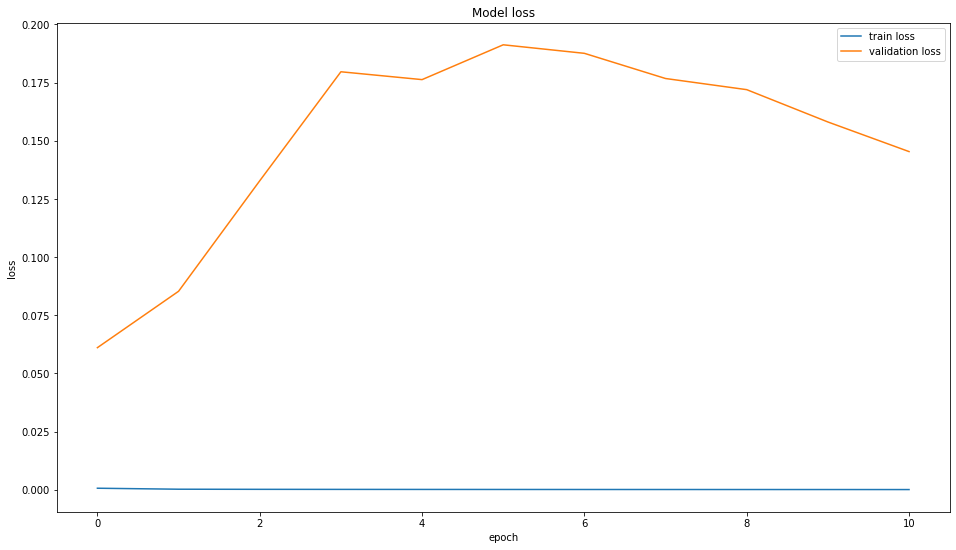

In [129]:
plt.figure(figsize=(16,9))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'validation loss'])
plt.show()

In [130]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'rsi_2', 'SMA_2',
       'rsi_6', 'SMA_6', 'macd'],
      dtype='object')

In [131]:
model_path = 'Bidirectional_LSTM_Multivariate.h5'
early_stopings = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='min')
checkpoint =  tf.keras.callbacks.ModelCheckpoint(model_path, monitor='val_loss', save_best_only=True, mode='min', verbose=0)
callbacks=[early_stopings,checkpoint]

In [132]:
  data_val = X_scaler.fit_transform(df[['Open','High',	'Low'	,	'Volume','rsi_2','SMA_2','rsi_6','SMA_6','macd']].tail(20))
  val_rescaled = data_val.reshape(1, data_val.shape[0], data_val.shape[1])

In [133]:
pred = lstm_model.predict(val_rescaled)
pred

array([[0.19997771, 0.19639172, 0.1949256 , 0.19035882, 0.1877674 ,
        0.18413378, 0.18730727, 0.16693671, 0.17149663, 0.17534548]],
      dtype=float32)

In [134]:
pred_Inverse = Y_scaler.inverse_transform(pred)

In [135]:
pred_Inverse

array([[1.7049083, 1.6748886, 1.6626152, 1.6243849, 1.6026913, 1.5722729,
        1.5988393, 1.4283098, 1.4664826, 1.4987028]], dtype=float32)

In [136]:
def timeseries_evaluation_metrics_func(y_true, y_pred):
    def mean_absolute_percentage_error(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')

In [137]:
pred_Inverse[0]

array([1.7049083, 1.6748886, 1.6626152, 1.6243849, 1.6026913, 1.5722729,
       1.5988393, 1.4283098, 1.4664826, 1.4987028], dtype=float32)

In [138]:
validate = (df[['Open','High',	'Low'	,	'Volume','rsi_2','SMA_2','rsi_6','SMA_6','macd','Close']].tail(10))

In [139]:
timeseries_evaluation_metrics_func(validate['Close'],pred_Inverse[0])

Evaluation metric results:-
MSE is : 1.5679270787640331
MAE is : 1.2484794402732848
RMSE is : 1.2521689497683741
MAPE is : 44.069534209604456
R2 is : -210.6351138545717



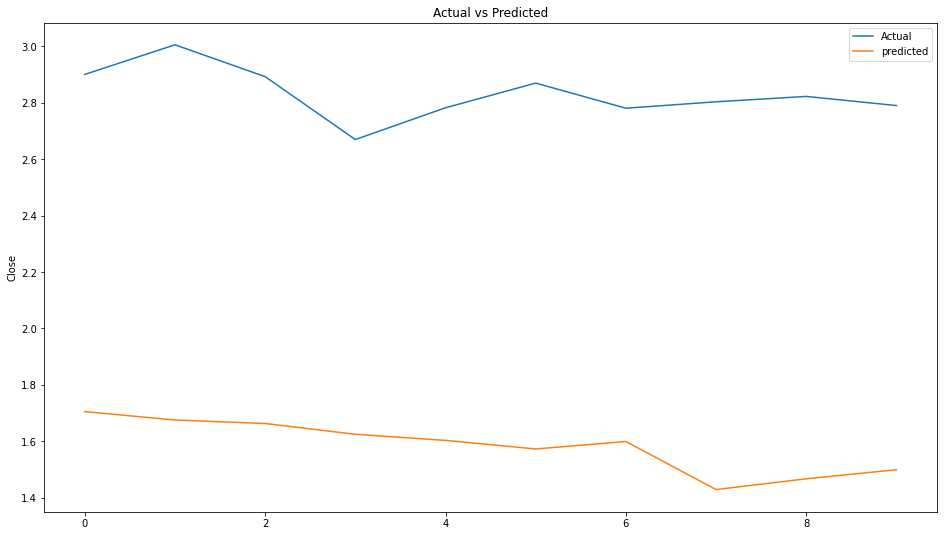

In [140]:
plt.figure(figsize=(16,9))
plt.plot( list(validate['Close']))
plt.plot( list(pred_Inverse[0]))
plt.title("Actual vs Predicted")
plt.ylabel("Close")
plt.legend(('Actual','predicted'))
plt.show()